In [1]:
import re
import nltk
import pandas as pd
import wrangle
import unicodedata
from wrangle import wrangle_articles
import env

In [2]:
all_articles_df, only_articles_with_text_df = wrangle_articles()

/Users/liamjackson/codeup-data-science/fake_news_capstone/fake_news_capstone/wrangle.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df.date[row] = "Aug 16, 2016"


NaN values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------
Empty values
       rows  columns
0       120        1
1       120        6
2       122        1
3       122        6
4       152        1
...     ...      ...
1258  25152        6
1259  25701        1
1260  25701        6
1261  25746        1
1262  25746        6

[1263 rows x 2 columns]
--------------------------------


In [19]:
all_articles = all_articles_df

In [20]:
df = all_articles

In [21]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt', 'reuters']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [22]:
def show_counts_and_ratios(df, column):
    """
    This fucntion takes in a df and column name.
    Will produce a valuecounts for each label and the percetage of the data it represents
    """
    fof = pd.concat([df.is_fake.value_counts(),
                        df.is_fake.value_counts(normalize=True)], axis=1)
    fof.columns = ['n', 'percent']
    
    return fof

show_counts_and_ratios(all_articles, 'is_fake')

,n,percent
True,23471,0.522879
False,21417,0.477121


In [23]:
df['text'] = df['text'].astype(str)

In [24]:
df['title'] = df['title'].astype(str)

In [36]:
df['clean_text'] = df['clean_text'].astype(str)

In [37]:
df['clean_title'] = df['clean_title'].astype(str)

In [38]:
df

,title,text,subject,date,is_fake,clean_title,clean_text
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,True,flashback king obama commute sentence 22 drug ...,making room hillary president obama today anno...
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,True,apple ceo say religious freedom law dangerous ...,gay mafia new corporate article need read shee...
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,True,watch dirty harry reid lie romneys tax didnt win,case missed sen harry reid rnv announced last ...
37305,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,True,oh guess funded shrine ted kennedy,nothing like political cronyism make stomach c...
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,True,benghazi panel call hillary testify oath white...,anyone really think hillary clinton come clean...
...,...,...,...,...,...,...,...
30504,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,politics,2017-12-31,True,barbra streisand give dream impeaching trump f...,barbra streisand obama sycophant one corrupt c...
30505,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,politics,2017-12-31,True,watch senator lindsey graham drop bombshell fi...,everyone suspected sketchy steele dossier corr...
44120,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,Middle-east,2017-12-31,True,year review 2017 top ten conspiracy,patrick henningsen shawn helton 21st century w...
38878,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,left-news,2017-12-31,True,barbra streisand give dream impeaching trump f...,barbra streisand obama sycophant one corrupt c...


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 37302 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        44888 non-null  object        
 1   text         44888 non-null  object        
 2   subject      44888 non-null  object        
 3   date         44888 non-null  datetime64[ns]
 4   is_fake      44888 non-null  bool          
 5   clean_title  44888 non-null  object        
 6   clean_text   44888 non-null  object        
dtypes: bool(1), datetime64[ns](1), object(5)
memory usage: 3.7+ MB


In [39]:
fake_words = clean(' '.join(df[df.is_fake == True].clean_text))
real_words = clean(' '.join(df[df.is_fake == False].clean_text))
all_words = clean(' '.join(df.clean_text))

In [40]:
fake_words[0:20]

['making',
 'room',
 'hillary',
 'president',
 'obama',
 'today',
 'announced',
 'decision',
 'commute',
 'sentence',
 '22',
 'convicted',
 'drug',
 'offender',
 'many',
 'serving',
 'time',
 'convicted',
 'conspiracy',
 'distribute']

In [41]:
real_words[0:20]

['washington',
 'united',
 'state',
 'expand',
 'program',
 'helping',
 'thousand',
 'people',
 'fleeing',
 'violence',
 'el',
 'salvador',
 'guatemala',
 'honduras',
 'secretary',
 'state',
 'john',
 'kerry',
 'said',
 'wednesday']

In [42]:
all_words[0:20]

['making',
 'room',
 'hillary',
 'president',
 'obama',
 'today',
 'announced',
 'decision',
 'commute',
 'sentence',
 '22',
 'convicted',
 'drug',
 'offender',
 'many',
 'serving',
 'time',
 'convicted',
 'conspiracy',
 'distribute']

In [43]:
fake_freq = pd.Series(fake_words).value_counts()
real_freq = pd.Series(real_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

fake_freq.head(10)

trump        73747
said         31010
president    26075
people       26031
one          23682
would        23426
state        21951
clinton      18595
like         18140
obama        17791
dtype: int64

In [44]:
real_freq.head(10)

said          99039
trump         54351
state         36386
would         31520
president     26997
republican    22109
government    19466
year          18769
house         16934
new           16786
dtype: int64

In [45]:
all_freq.head(10)

said          130049
trump         128098
state          58337
would          54946
president      53072
people         41358
republican     38107
one            36736
year           33507
also           31173
dtype: int64

In [46]:
word_counts = (pd.concat([all_freq, fake_freq, real_freq], axis=1, sort=True)
                .set_axis(['all', 'fake', 'real'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.tail(10)

,all,fake,real
zypries,5,0,5
zyries,1,0,1
zyuganov,7,0,7
zyuseragentifzxzbreak,1,1,0
zz,1,1,0
zzbluecomet,1,1,0
zztaine,1,1,0
zzzzaaaacccchhh,3,3,0
zzzzzzzz,1,1,0
zzzzzzzzzzzzz,1,1,0


In [47]:
word_counts.sort_values(by='all', ascending=False).head(50)

,all,fake,real
said,130049,31010,99039
trump,128098,73747,54351
state,58337,21951,36386
would,54946,23426,31520
president,53072,26075,26997
people,41358,26031,15327
republican,38107,15998,22109
one,36736,23682,13054
year,33507,14738,18769
also,31173,15221,15952


# Visualizations

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Fake vs Real news for the 20 most common words')

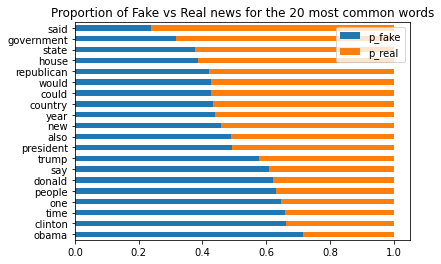

In [49]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_fake=word_counts.fake / word_counts['all'],
         p_real=word_counts.real / word_counts['all'])
 .sort_values(by='all')
 [['p_fake', 'p_real']]
 .tail(20)
 .sort_values('p_real')
 .plot.barh(stacked=True))

plt.title('Proportion of Fake vs Real news for the 20 most common words')

In [68]:
word_counts_r  = (word_counts
 [(word_counts.fake > 10) & (word_counts.real > 10)]
 .assign(ratio=lambda df: df.fake / (df.real + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

In [69]:
word_counts_r

,all,fake,real,ratio
catalan,1105,12,1093,0.010979
mugabe,951,11,940,0.011702
im,1242,20,1222,0.016366
catalonia,962,16,946,0.016913
thats,1177,20,1157,0.017286
damn,495,483,12,40.216486
rant,545,532,13,40.891622
gop,4262,4170,92,45.321161
hannity,1207,1191,16,74.391006
cop,1390,1374,16,85.821362


# Wordclouds for Real-Fake-Combined

In [51]:
from wordcloud import WordCloud

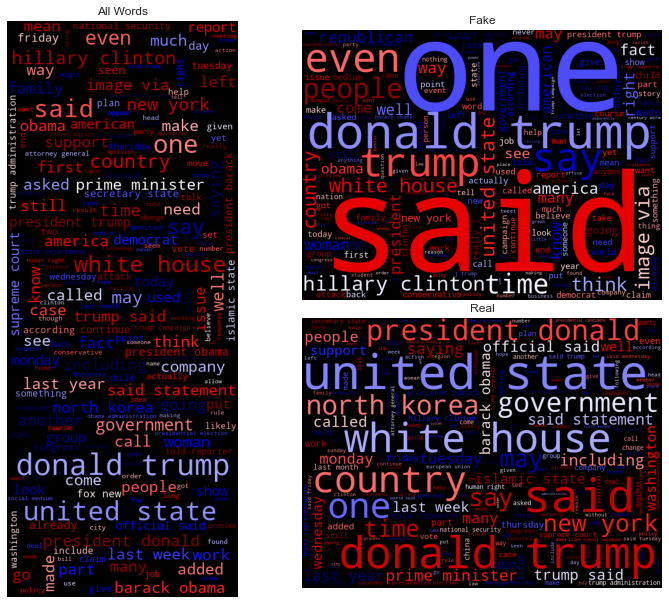

In [72]:
all_cloud = WordCloud(background_color='black', height=1000, width=400, colormap="seismic_r").generate(' '.join(all_words))
fake_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(fake_words))
real_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(real_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(fake_cloud)
axs[2].imshow(real_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Fake')
axs[2].set_title('Real')

for ax in axs: ax.axis('off')

In [53]:
import numpy as np
from PIL import Image

# Bigrams (Fake - Real)

In [115]:
top_20_fake_bigrams = (pd.Series(nltk.ngrams(fake_words, 2))
                      .value_counts()
                      .head(20))

top_20_fake_bigrams.head()

(donald, trump)       13100
(hillary, clinton)     6693
(white, house)         6287
(image, via)           6197
(united, state)        6179
dtype: int64

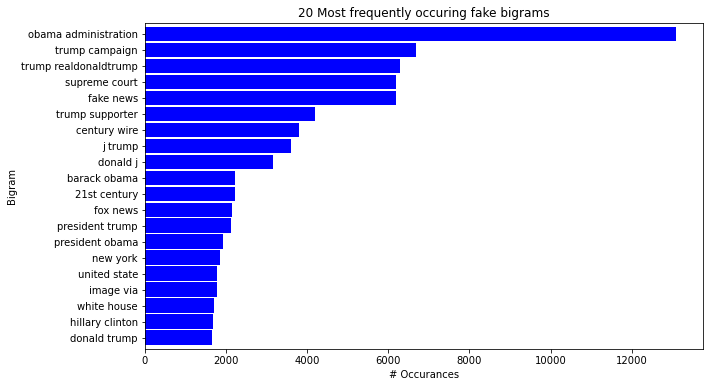

In [55]:
top_20_fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring fake bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_fake_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [116]:
top_20_real_bigrams = (pd.Series(nltk.ngrams(real_words, 2))
                      .value_counts()
                      .head(20))

top_20_real_bigrams.head()

(united, state)        12199
(donald, trump)        10132
(white, house)          8394
(president, donald)     5929
(north, korea)          5637
dtype: int64

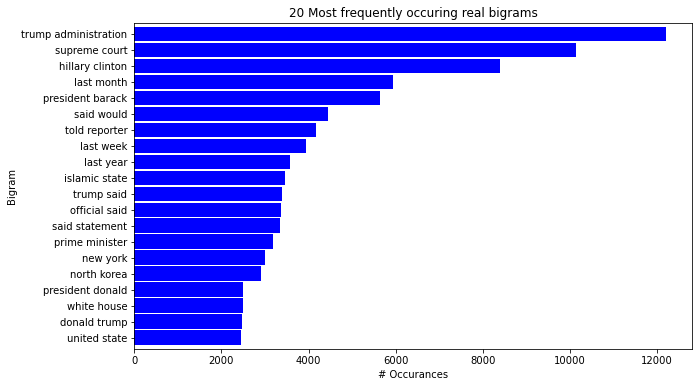

In [57]:
top_20_real_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring real bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_real_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [ ]:
top_20_real_trigrams2 = (pd.Series(nltk.ngrams(real_words, 3))
                      .value_counts()
                      .head(20))

top_20_real_trigrams2.head()

# Trigrams (Real - Fake)

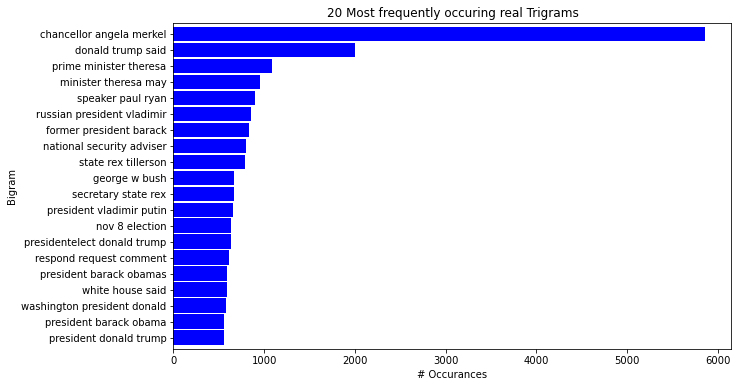

In [59]:
top_20_real_trigrams2.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring real Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_real_trigrams2.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

In [75]:
top_20_fake_trigrams2 = (pd.Series(nltk.ngrams(fake_words, 3))
                      .value_counts()
                      .head(20))

top_20_fake_trigrams2.head()

(donald, j, trump)             2113
(21st, century, wire)          1902
(j, trump, realdonaldtrump)    1692
(new, york, time)              1478
(black, life, matter)          1228
dtype: int64

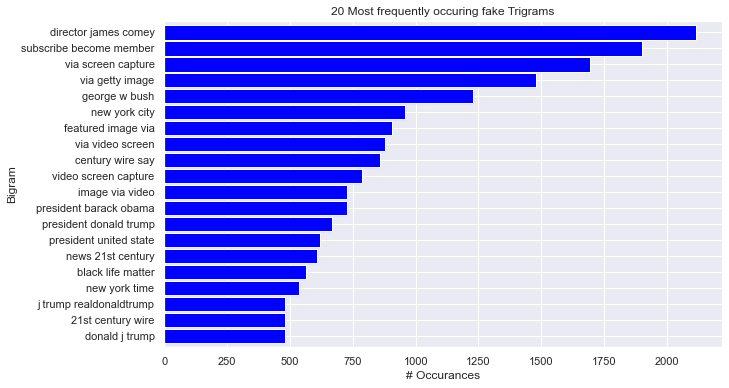

In [78]:
top_20_fake_trigrams2.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring fake Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_fake_trigrams2.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

# Wordclouds for Single-Bigram-Trigram

In [79]:
all_cloud = WordCloud(background_color='black', height=1000, width=400, colormap="seismic_r").generate(' '.join(all_words))
real_b_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(top_20_real_bigrams))
real_t_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(top_20_real_trigrams2))
fake_b_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(top_20_fake_bigrams))
fake_t_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(top_20_fake_trigrams2))

plt.figure(figsize=(20, 10))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(real_b_cloud)
axs[2].imshow(real_t_cloud)
axs[3].imshow(fake_b_cloud)
axs[4].imshow(fake_t_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Real Bigram')
axs[2].set_title('Real Trigram')
axs[3].set_title('Fake Bigram')
axs[4].set_title('Fake Trigram')

for ax in axs: ax.axis('off')

TypeError: sequence item 0: expected str instance, int found

In [141]:
real_b_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(top_20_real_bigrams))
axs = [plt.axes([0, 0, .5, 1])]
axs[1].imshow(real_b_cloud)
axs[1].set_title('Real Bigram')
for ax in axs: ax.axis('off')

TypeError: sequence item 0: expected str instance, tuple found